* Use the snb-data-zimoma-en-all-20170502_1430.csv file to produce the following

In [16]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [17]:
df = pd.read_csv("data/snb-data-zimoma-en-all-20170502_1430.csv")
df['Date'] = pd.to_datetime(df['Date'])

In [18]:
df.head(5)

,Date,D0,Value
0,1972-01-01,SARON,NaN
1,1972-01-01,1TGT,0.0
2,1972-01-01,EG3M,NaN
3,1972-01-01,1M,NaN
4,1972-01-01,3M0,NaN


### Plots

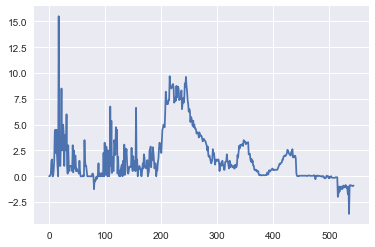

In [19]:
# Line chart of the ‘1TGT’ series
tgt1_df = df[df.D0 == '1TGT'].copy()
timeseries = [x for x in range(0,len(tgt1_df))]

plt.plot(timeseries, tgt1_df.Value)
None

In [20]:
# Box plots of all series 
boxplot_df = df.reset_index()
boxplot_df.set_index(['Date', 'D0'], inplace=True)

boxplot_df.sort_index(inplace=True)
bp_df = boxplot_df.unstack()['Value'].reset_index()

columns = bp_df.columns[1:].tolist()

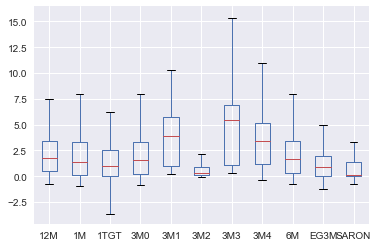

In [21]:
ax = bp_df.plot.box(y=columns)
None

In [22]:
# Scatter plot each of the different 3-month rates
scatter_df = df.copy().reset_index()
scatter_df.set_index(['Date', 'D0'], inplace=True)
scatter_df.sort_index(inplace=True)
sp_df = scatter_df.unstack()['Value'].reset_index()

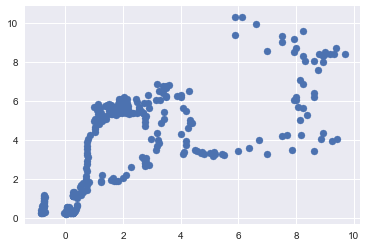

In [23]:
plt.scatter(x=sp_df['3M0'], y=sp_df['3M1'])
None

In [24]:
# Bar plot of avg 1TGT rates per year
barplot_df = df.loc[df.D0 == '1TGT'].copy()

barplot_df['year'] = [x for x in barplot_df.Date.dt.year]

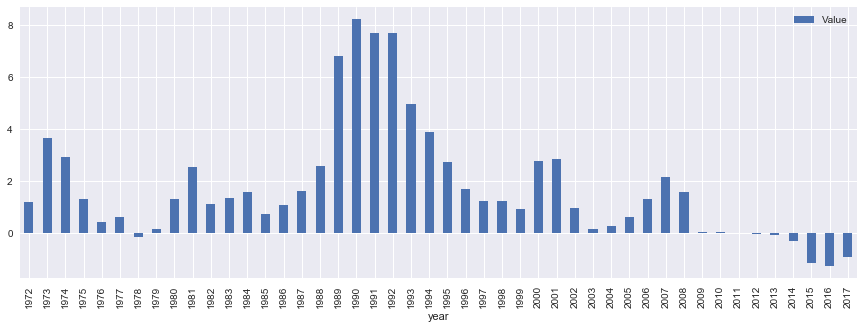

In [25]:
plt.figure(figsize=(20,20))

barplot_df.groupby('year').mean().plot.bar(figsize=(15,5))
None

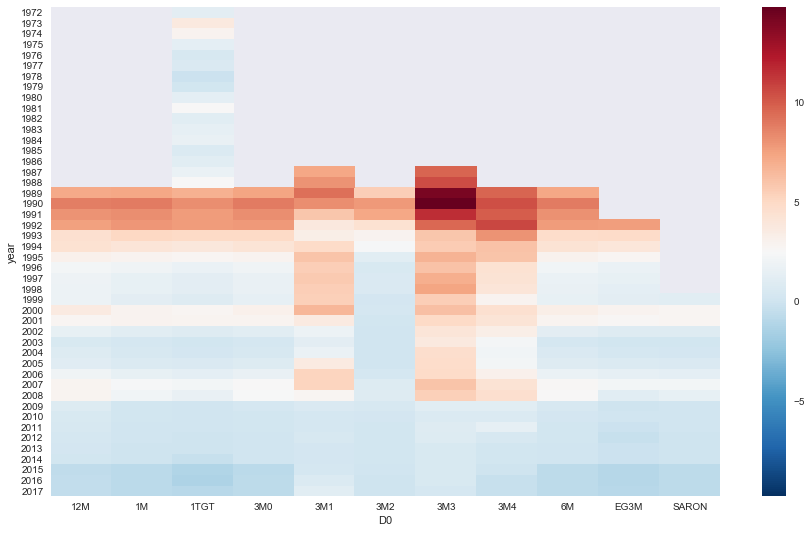

In [36]:
# Heatmap of money-market rates
heat_df = df.copy()
heat_df['year'] = [x for x in heat_df.Date.dt.year]
heat_df = heat_df.drop('Date', 1)
labels = heat_df.year.unique()

hm_df = heat_df.groupby(['year', 'D0']).mean().sort_index().unstack()['Value']

plt.figure(figsize=(15,9))
ax = sns.heatmap(hm_df, yticklabels=labels, center=hm_df.stack().mean())

In [34]:
# Quantitize the heatmap values
# TODO

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


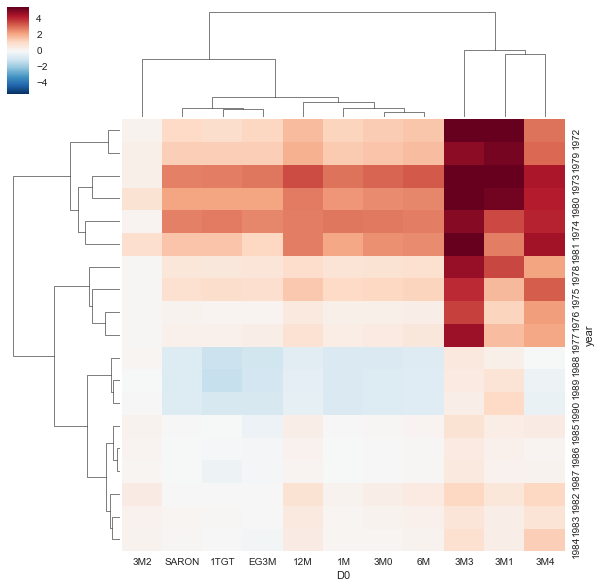

In [37]:
# Clustered heatmap of money-market rates -> Using the same dataset above
cg = sns.clustermap(hm_df.dropna(), yticklabels=labels, robust=True, figsize=(10, 10))

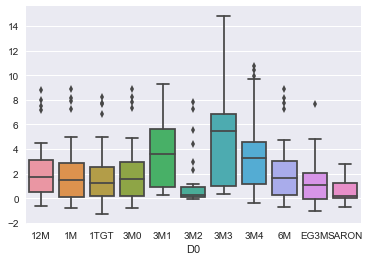

In [38]:
#Box plots with outliers of all series -> Using the dataset above
ax = sns.boxplot(data=hm_df)

In [ ]:
#Time-series plots of all series (using Seaborn)

In [232]:
ts_df['1TGT']

year
1972    1.187500
1973    3.677083
1974    2.916667
1975    1.302083
1976    0.416667
1977    0.635417
1978   -0.166667
1979    0.145833
1980    1.302083
1981    2.546875
1982    1.125000
1983    1.359375
1984    1.567708
1985    0.723958
1986    1.083333
1987    1.640625
1988    2.572917
1989    6.828125
1990    8.239583
1991    7.708333
1992    7.697917
1993    4.979167
1994    3.906250
1995    2.755208
1996    1.687500
1997    1.244792
1998    1.218750
1999    0.945312
2000    2.790208
2001    2.850833
2002    0.952500
2003    0.170833
2004    0.282500
2005    0.635000
2006    1.331667
2007    2.165000
2008    1.577500
2009    0.041667
2010    0.049167
2011    0.024167
2012   -0.014167
2013   -0.075833
2014   -0.285833
2015   -1.158333
2016   -1.266667
2017   -0.925000
Name: 1TGT, dtype: float64

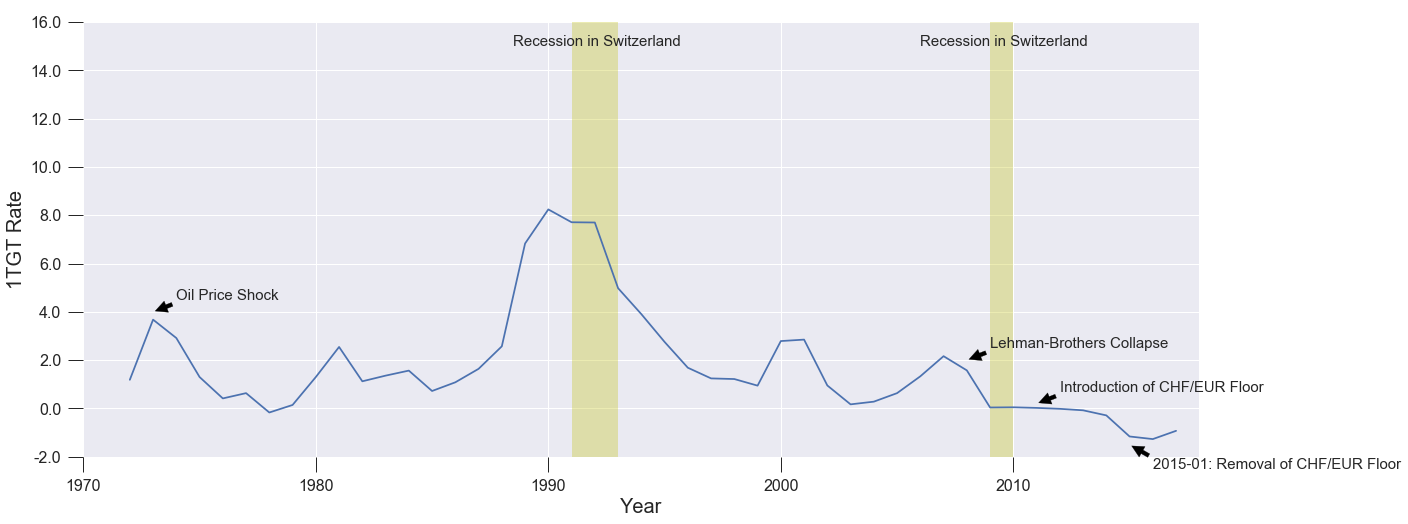

In [239]:
timeseries_df = df.copy()

timeseries_df['year'] = [x for x in timeseries_df.Date.dt.year]
ts_df = timeseries_df.groupby(['year', 'D0']).mean().sort_index().unstack()['Value']


#sns.tsplot(ts_df, time='year')

fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111)

g = ax.plot(ts_df['1TGT'])

# 1973-11: Oil Price Shock
# 1991-01 – 1993-12: Recession in Switzerland
# 2009-01 – 2009-12: Recession in Switzerland
# 2008-09: Lehman-Brothers collapse
# 2011-08: Introduction of CHF/EUR floor
# 2015-01: Removal of CHF/EUR floor

ax.set_ylim(-2,16)
ax.set_xlim(1970,2018)

annotate_kws = dict(arrowprops=dict(facecolor='black', shrink=0.09), fontsize=15)

ax.axvspan(1991, 1993, color='y', alpha=0.3, lw=0)
ax.text(1988.5, 15, 'Recession in Switzerland', fontsize=15)

ax.axvspan(2009, 2010, color='y', alpha=0.3, lw=0)
ax.text(2006, 15, 'Recession in Switzerland', fontsize=15)

ax.annotate('Oil Price Shock', 
            xy=(1973, 4), 
            xytext=(1974, 4.5),
            **annotate_kws)

ax.annotate('Lehman-Brothers Collapse', 
            xy=(2008, 2), 
            xytext=(2009, 2.5),
            **annotate_kws)

ax.annotate('Introduction of CHF/EUR Floor', 
            xy=(2011, 0.2), 
            xytext=(2012, 0.7),
            **annotate_kws)

ax.annotate('2015-01: Removal of CHF/EUR Floor', 
            xy=(2015, -1.5), 
            xytext=(2016, -2.5),
            **annotate_kws)

ax.tick_params(size=15)
ax.set_xlabel('Year', fontsize=20)
ax.set_ylabel('1TGT Rate', fontsize=20)
ax.set_xticklabels(ax.get_xticks().astype(int), size=16)
ax.set_yticklabels(ax.get_yticks(), size=16)

None

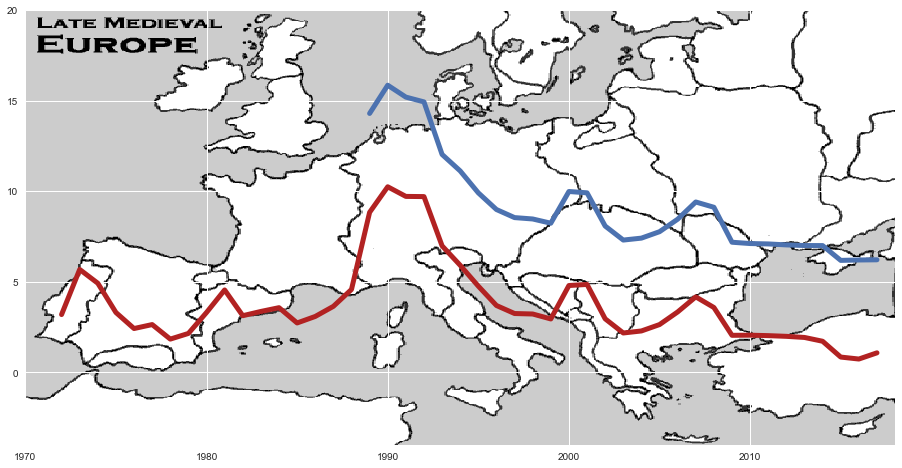

In [261]:
img = plt.imread("data/europe.jpg")
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111)

ax.imshow(img, extent=[1970, 2018, -4, 20])

ax.plot(ts_df['1TGT']+2, color='firebrick', linewidth=5)
ax.plot(ts_df['1M']+7, linewidth=5)

None

In [71]:
# Scatter plot of each of the different 3-month rates, with regression lines -> Using the data above

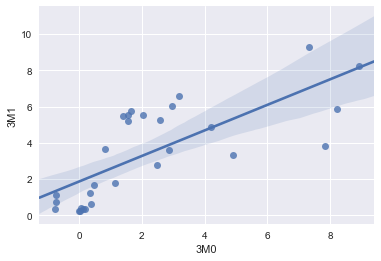

In [265]:
ax = sns.regplot(x='3M0', y='3M1', data=hm_df)

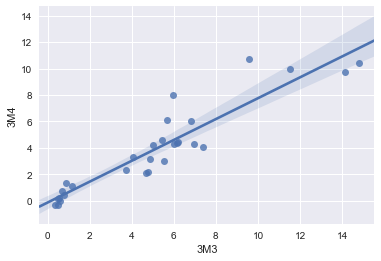

In [73]:
ax = sns.regplot(x='3M3', y='3M4', data=hm_df)

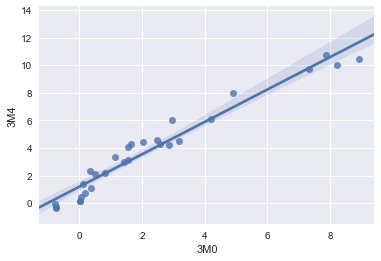

In [74]:
ax = sns.regplot(x='3M0', y='3M4', data=hm_df)